In [2]:
import sys
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
datadir = '/data1/sassie/satellite/smap/'
filename = datadir + '*.nc'
ds = xr.open_mfdataset(filename)
ds

<xarray.Dataset>
Dimensions:               (latitude: 720, longitude: 1440, time: 16)
Coordinates:
  * latitude              (latitude) float32 89.88 89.62 89.38 ... -89.62 -89.88
  * longitude             (longitude) float32 -179.9 -179.6 ... 179.6 179.9
  * time                  (time) datetime64[ns] 2021-08-05T12:00:00 ... 2021-...
Data variables:
    smap_sss              (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    anc_sss               (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    anc_sst               (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_spd              (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_high_spd         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    weight                (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    land_fraction         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ice_fraction          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    smap_sss_uncertainty  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/40)
    title:                       SMAP 0.25x0.25 deg grid averaged 8-day SSS/WSPD
    institution:                 Jet Propulsion Laboratory
    source:                      SMAP L2B SSS
    history:                     DATA_SOURCE_VERSION V5.0 L2B SMAP SSS/WSPD
    comment:                     Gaussian-weighted map gridding of SMAP L2B S...
    Gaussian_window_radius:      45.0
    ...                          ...
    creator_name:                JPL
    creator_email:               fore@jpl.nasa.gov
    publisher_name:              Alexander G. Fore
    publisher_email:             fore@jpl.nasa.gov
    contributor_name:            Alexander Fore, Simon Yueh, Wenqing Tang, Ak...
    references:                  10.1109/TGRS.2016.2601486, 10.1109/TGRS.2016...

/home/kdrushka/miniconda3/envs/py33/lib/python3.9/site-packages/xarray/plot/utils.py:443: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(**kwargs)


AttributeError: 'GeoAxesSubplot' object has no attribute 'flat'

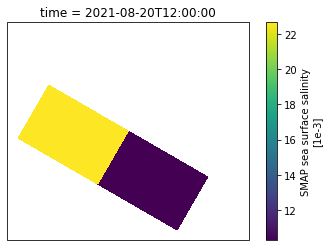

In [10]:
map_proj = ccrs.NorthPolarStereo(central_longitude=-150)
p = ds.smap_sss.isel(time=-1, longitude=[-170, -140], latitude=[60, 80]).plot(transform=ccrs.NorthPolarStereo(),  # the data's projection
             subplot_kws={'projection': map_proj})  # the plot's projection
#              col='time', col_wrap=1,  # multiplot settings
#              aspect=ds.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
#              subplot_kws={'projection': map_proj})  # the plot's projection

# We have to set the map's options on all axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])

In [27]:

# p = ds.smap_sss.sel(time=ds.time.values[-1], longitude=[-170, -140], latitude=[60, 80]).plot()
p = ds.smap_sss.isel(time=1, longitude=[0, 150], latitude=[50, 100]).values()

TypeError: 'numpy.ndarray' object is not callable

In [19]:
ds.time.values[-1]

numpy.datetime64('2021-08-20T12:00:00.000000000')

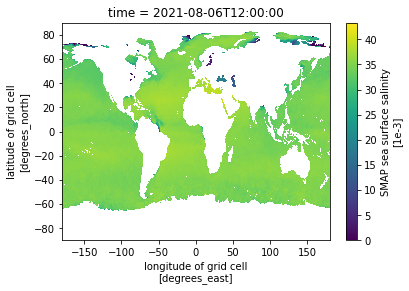

In [29]:
ds.smap_sss.isel(time=1).plot()

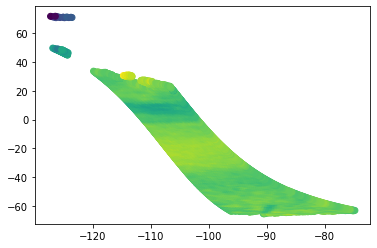

In [3]:
import xarray as xr

d=xr.open_dataset('https://podaac-opendap.jpl.nasa.gov/opendap/allData/smap/L2/JPL/V5.0_NRT/2021/315/SMAP_L2B_SSS_NRT_36204_A_20211111T004015.h5')

plt.scatter(d['lon'],d['lat'],c=d['anc_sss'])

plt.show()